In [1]:
import pandas as pd
import seaborn as sns


In [34]:
homeless = pd.read_csv("homeless_19.csv")
income = pd.read_csv("income_2021.csv")
unemp = pd.read_csv("unemployment_2021.csv")
all_data = pd.read_csv("homeless_19.csv")
all_data = all_data.drop('fin_yr', axis=1)

In [35]:
income[" gccsa_code_2021"]

0     1GSYD
1     1RNSW
2     2GMEL
3     2RVIC
4     3GBRI
5     3RQLD
6     4GADE
7     4RSAU
8     5GPER
9     5RWAU
10    6GHOB
11    6RTAS
12    7GDAR
13    7RNTE
14    8ACTE
15    9OTER
Name:  gccsa_code_2021, dtype: object

In [36]:
all_data = all_data.merge(income,how='left', left_on=" gccsa_code", right_on=" gccsa_code_2021")

In [37]:
all_data = all_data.drop(' gccsa_code_2021', axis = 1)
all_data

,gccsa_code,client_count,median_mortgage_repay_monthly,median_rent_weekly,median_tot_fam_inc_weekly
0,1GSYD,27877,2427,470,2374
1,1RNSW,38919,1733,330,1852
2,2GMEL,63354,2000,390,2243
3,2RVIC,34458,1430,285,1808
4,3GBRI,13714,1863,380,2175
5,3RQLD,25891,1655,345,1868
6,4GADE,13176,1562,320,1988
7,4RSAU,5589,1153,220,1525
8,5GPER,12315,1907,350,2259
9,5RWAU,9491,1560,265,2013


In [38]:
all_data = all_data.merge(unemp,how='left', left_on=" gccsa_code", right_on=' gccsa_code_2016')
all_data = all_data.drop(' gccsa_code_2016', axis = 1)
all_data

,gccsa_code,client_count,median_mortgage_repay_monthly,median_rent_weekly,median_tot_fam_inc_weekly,yth_unemp_rt_15_24,mpy_rt_15_64,unemp_rt_15
0,1GSYD,27877,2427,470,2374,11.7,73.699997,5.3
1,1RNSW,38919,1733,330,1852,NaN,NaN,NaN
2,2GMEL,63354,2000,390,2243,12.6,75.000000,5.4
3,2RVIC,34458,1430,285,1808,NaN,NaN,NaN
4,3GBRI,13714,1863,380,2175,11.7,75.400002,5.8
5,3RQLD,25891,1655,345,1868,NaN,NaN,NaN
6,4GADE,13176,1562,320,1988,12.0,74.300003,5.6
7,4RSAU,5589,1153,220,1525,NaN,NaN,NaN
8,5GPER,12315,1907,350,2259,10.6,77.099998,4.9
9,5RWAU,9491,1560,265,2013,NaN,NaN,NaN


In [39]:
all_data.to_csv('all_data.csv', index=False)

In [40]:
list(all_data.columns)

[' gccsa_code',
 ' client_count',
 'median_mortgage_repay_monthly',
 ' median_rent_weekly',
 ' median_tot_fam_inc_weekly',
 'yth_unemp_rt_15_24',
 ' mpy_rt_15_64',
 ' unemp_rt_15']

In [41]:
all_data.rename(columns={' gccsa_code': 'GCC', ' client_count': "homeless_count",
                    'median_mortgage_repay_monthly': 'mortgage', ' median_rent_weekly': 'rent', 
                    ' median_tot_fam_inc_weekly': 'family_income', 'yth_unemp_rt_15_24':'unemployment_rate_15_24', 
                    ' mpy_rt_15_64':'employment_rate', ' unemp_rt_15':'unemployment_rate'}, inplace=True)
all_data.head()

,GCC,homeless_count,mortgage,rent,family_income,unemployment_rate_15_24,employment_rate,unemployment_rate
0,1GSYD,27877,2427,470,2374,11.7,73.699997,5.3
1,1RNSW,38919,1733,330,1852,NaN,NaN,NaN
2,2GMEL,63354,2000,390,2243,12.6,75.000000,5.4
3,2RVIC,34458,1430,285,1808,NaN,NaN,NaN
4,3GBRI,13714,1863,380,2175,11.7,75.400002,5.8


In [42]:
all_data = all_data.drop('unemployment_rate_15_24', axis = 1)
all_data

,GCC,homeless_count,mortgage,rent,family_income,employment_rate,unemployment_rate
0,1GSYD,27877,2427,470,2374,73.699997,5.3
1,1RNSW,38919,1733,330,1852,NaN,NaN
2,2GMEL,63354,2000,390,2243,75.000000,5.4
3,2RVIC,34458,1430,285,1808,NaN,NaN
4,3GBRI,13714,1863,380,2175,75.400002,5.8
5,3RQLD,25891,1655,345,1868,NaN,NaN
6,4GADE,13176,1562,320,1988,74.300003,5.6
7,4RSAU,5589,1153,220,1525,NaN,NaN
8,5GPER,12315,1907,350,2259,77.099998,4.9
9,5RWAU,9491,1560,265,2013,NaN,NaN


In [43]:
cormat = all_data.corr()
round(cormat,2)

/var/folders/40/9vw7p_6x52g01tcrwk2ntylm0000gn/T/ipykernel_75254/1213747157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = all_data.corr()


,homeless_count,mortgage,rent,family_income,employment_rate,unemployment_rate
homeless_count,1.00,0.30,0.33,0.08,-0.24,-0.03
mortgage,0.30,1.00,0.79,0.76,-0.29,-0.33
rent,0.33,0.79,1.00,0.85,-0.48,-0.08
family_income,0.08,0.76,0.85,1.00,0.04,-0.51
employment_rate,-0.24,-0.29,-0.48,0.04,1.00,-0.51
unemployment_rate,-0.03,-0.33,-0.08,-0.51,-0.51,1.00


<Axes: xlabel='family_income', ylabel='homeless_count'>

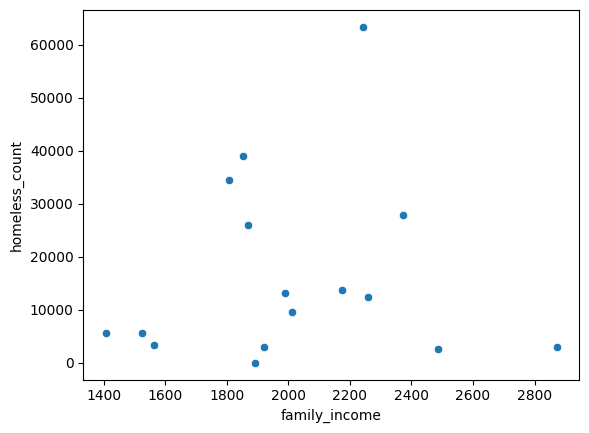

In [49]:
sns.scatterplot(x="family_income", y="homeless_count", data=all_data)

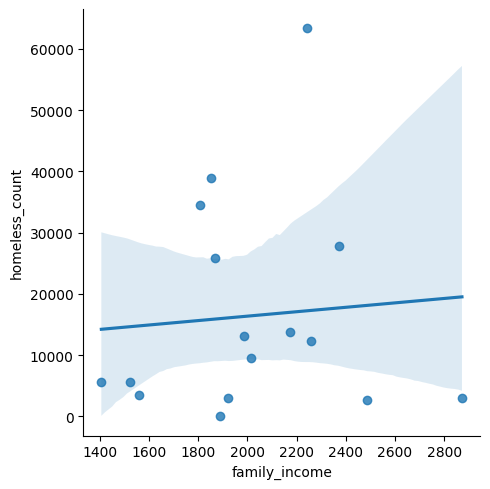

In [50]:
sns.lmplot(x="family_income", y="homeless_count", data=all_data)

<Axes: xlabel='unemployment_rate', ylabel='homeless_count'>

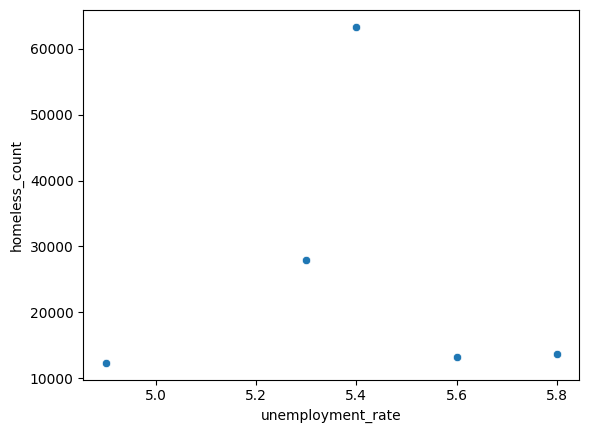

In [51]:
sns.scatterplot(x="unemployment_rate", y="homeless_count", data=all_data)

<Axes: xlabel='rent', ylabel='homeless_count'>

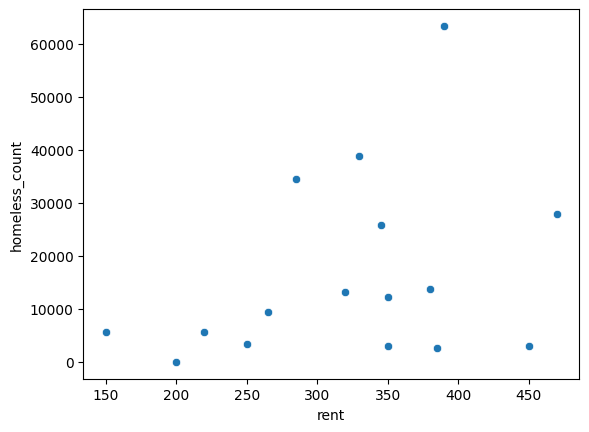

In [53]:
sns.scatterplot(x="rent", y="homeless_count", data=all_data)

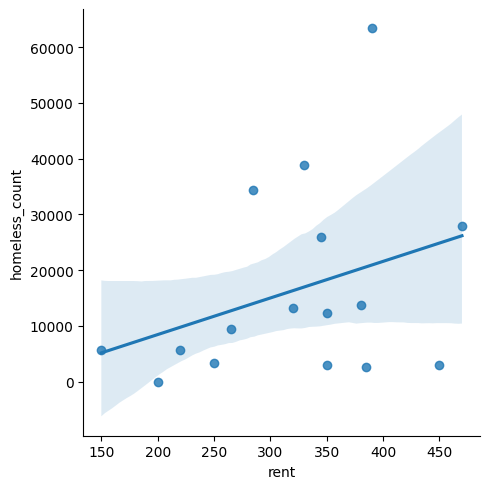

In [54]:
sns.lmplot(x="rent", y="homeless_count", data=all_data)

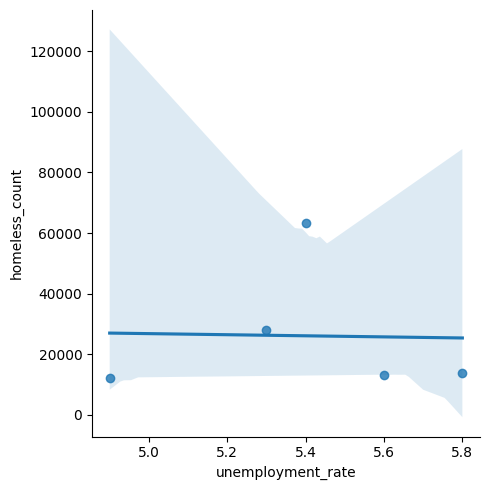

In [52]:
sns.lmplot(x="unemployment_rate", y="homeless_count", data=all_data)

<Axes: >

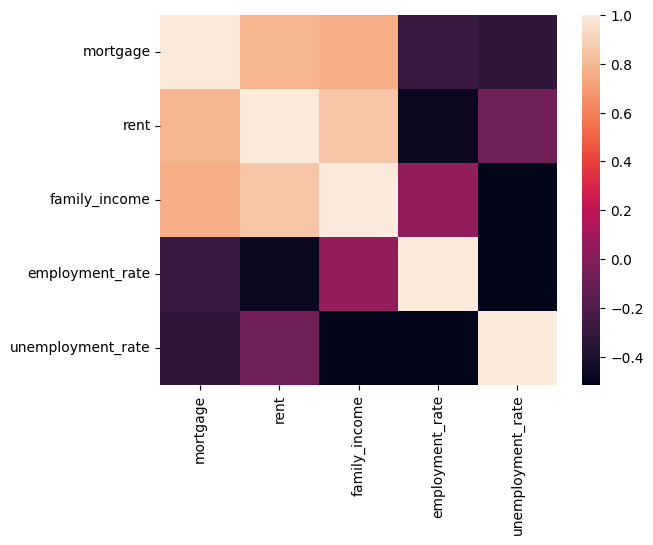

In [33]:
sns.heatmap(cormat)